# Support Vector Machines

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import hinge_loss, accuracy_score

In [2]:
data = pd.read_table('ex6data1.txt', sep=',', header=None, dtype=np.float32)
data

,0,1,2
0,1.964300,4.5957,1.0
1,2.275300,3.8589,1.0
2,2.978100,4.5651,1.0
3,2.932000,3.5519,1.0
4,3.577200,2.8560,1.0
5,4.015000,3.1937,1.0
6,3.381400,3.4291,1.0
7,3.911300,4.1761,1.0
8,2.782200,4.0431,1.0
9,2.551800,4.6162,1.0


In [3]:
X_train = data.iloc[:,[0,1]].values
Y_train = data.iloc[:,[2]].values

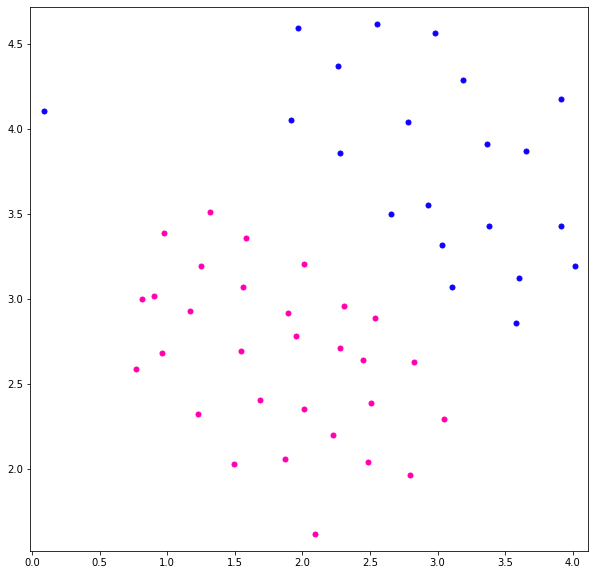

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.axis([np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1])
pos = np.where(Y_train[:,0] == 1)[0]
neg = np.where(Y_train[:,0] == 0)[0]
ax.plot(X_train[pos,0], X_train[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='') 
ax.plot(X_train[neg,0], X_train[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='')

In [5]:
class LinearKernel():
    def __init__(self, K):
        self.K = K
    def __call__(self, inputs):
        l1 = self.K.shape[0]
        l2 = inputs.shape[0]
        result = np.zeros((l1,l2))
        for i in range(l1):
            for j in range(l2):
                result[i,j] = np.dot(self.K[i,:],inputs[j,:].T)
        return result.T

In [6]:
model = Pipeline([('linear_kernel', FunctionTransformer(LinearKernel(K=X_train))),
                  ('svm', SVC(C=0.01, kernel='linear', max_iter=10000))])

model.fit(X_train, Y_train.flatten())  

Pipeline(memory=None,
         steps=[('linear_kernel',
                 FunctionTransformer(accept_sparse=False, check_inverse=True,
                                     func=<__main__.LinearKernel object at 0x7fe48e685128>,
                                     inv_kw_args=None, inverse_func=None,
                                     kw_args=None, validate=False)),
                ('svm',
                 SVC(C=0.01, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='scale',
                     kernel='linear', max_iter=10000, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [7]:
Y_pred = model.decision_function(X_train)
Y_pred

array([ 3.35425725,  1.67841772,  5.11043316,  1.94169616,  1.00000885,
        2.82673959,  2.38761585,  5.62844577,  3.1638733 ,  4.48836377,
        3.83083851,  0.79252865,  1.61915617,  3.21528779,  1.28174385,
        4.64757944,  4.23186101,  3.35423876,  1.85209449,  1.41419748,
       -1.10893237, -0.79910332, -2.18162818, -1.81113737, -0.99999828,
       -1.05141252, -1.68033731, -3.48903041, -2.38760493, -4.5407572 ,
       -3.3847595 , -4.90727218, -1.88148359, -2.02361181, -3.19721998,
       -3.81747958, -5.3274633 , -4.3002732 , -3.17440651, -3.60783086,
       -2.12960564, -2.2170666 , -1.12531591, -3.45307891, -1.71372285,
       -3.13982151, -5.48100826, -0.79799955, -3.3769278 , -4.93792917,
       -1.56676274])

In [8]:
hinge_loss(Y_train, Y_pred)

0.06229672435000859

In [9]:
Y_pred_label = model.predict(X_train)
Y_pred_label

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [10]:
Y_train

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [11]:
accuracy_score(Y_train, Y_pred_label)

0.9803921568627451

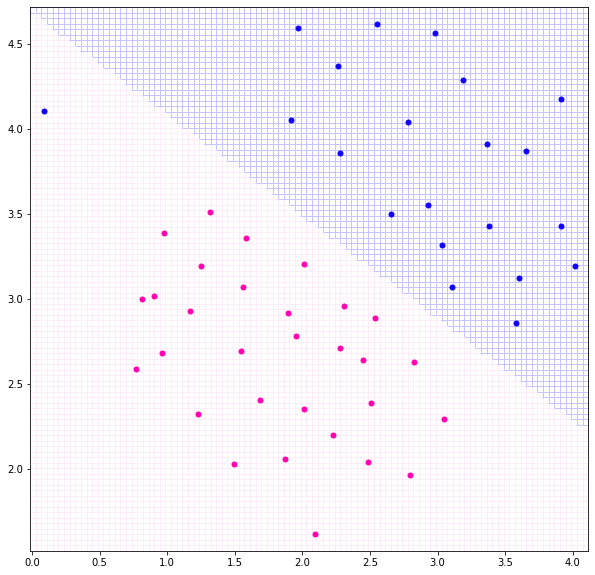

In [12]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.axis([np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1])
u = np.linspace(np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, 100)
v = np.linspace(np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1, 100)
z = []
for i in range(100):
    for j in range(100):
        z.append([u[i], v[j]])
z = np.array(z)
w = model.predict(z)
model_pos = np.where(w == 1)[0]
model_neg = np.where(w == 0)[0]
ax.plot(z[model_pos,0], z[model_pos,1], marker='+', color='#C7C3FF', markersize=10, linestyle='')
ax.plot(z[model_neg,0], z[model_neg,1], marker='+', color='#FFECFB', markersize=10, linestyle='')
pos = np.where(Y_train[:,0] == 1)[0]
neg = np.where(Y_train[:,0] == 0)[0]
ax.plot(X_train[pos,0], X_train[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='') 
ax.plot(X_train[neg,0], X_train[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='')

-----

In [13]:
data = pd.read_table('ex6data2.txt', sep=',', header=None, dtype=np.float32)
data

,0,1,2
0,0.107143,0.603070,1.0
1,0.093318,0.649854,1.0
2,0.097926,0.705409,1.0
3,0.155530,0.784357,1.0
4,0.210829,0.866228,1.0
...,...,...,...
858,0.994240,0.516667,1.0
859,0.964286,0.472807,1.0
860,0.975806,0.439474,1.0
861,0.989631,0.425439,1.0


In [14]:
X_train = data.iloc[:,[0,1]].values
Y_train = data.iloc[:,[2]].values

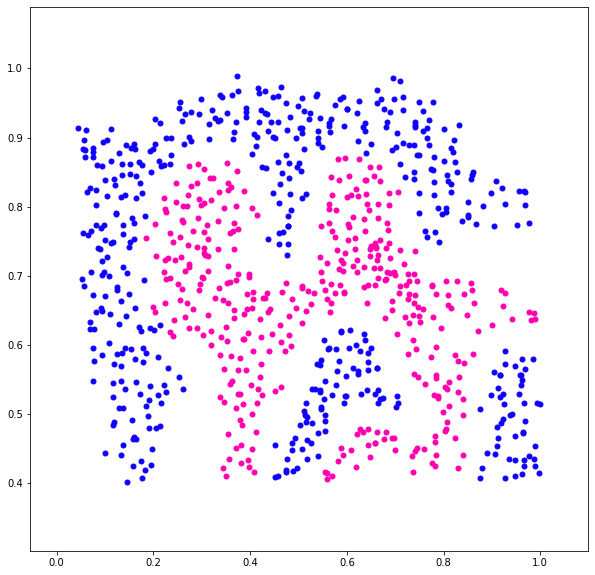

In [15]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.axis([np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1])
pos = np.where(Y_train[:,0] == 1)[0]
neg = np.where(Y_train[:,0] == 0)[0]
ax.plot(X_train[pos,0], X_train[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='') 
ax.plot(X_train[neg,0], X_train[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='')

In [16]:
class GaussianKernel():
    def __init__(self, K, sigma):
        self.K = K
        self.sigma = sigma
    def __call__(self, inputs):
        l1 = self.K.shape[0]
        l2 = inputs.shape[0]
        result = np.zeros((l1,l2))
        for i in range(l1):
            for j in range(l2):
                z = np.sum(np.power(self.K[i,:] - inputs[j,:], 2))
                result[i,j] = np.exp(-z/(2*np.power(self.sigma,2)))
        return result.T

In [17]:
model = Pipeline([('gaussian_kernel', FunctionTransformer(GaussianKernel(K=X_train, sigma=0.1))),
                  ('svm', SVC(C=1., kernel='linear', max_iter=10000))])

model.fit(X_train, Y_train.flatten())

Pipeline(memory=None,
         steps=[('gaussian_kernel',
                 FunctionTransformer(accept_sparse=False, check_inverse=True,
                                     func=<__main__.GaussianKernel object at 0x7fe48ecbe6a0>,
                                     inv_kw_args=None, inverse_func=None,
                                     kw_args=None, validate=False)),
                ('svm',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=10000,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [18]:
Y_pred = model.decision_function(X_train)
Y_pred

array([ 5.0130405 ,  3.99081578,  3.74951797,  2.96348401,  3.29844675,
        2.2401751 ,  2.54182168,  2.14988433,  7.20286809,  8.68477127,
        7.98356924,  3.682588  ,  7.09617474,  7.69970167,  7.55769703,
        6.71827657,  1.85480469,  0.99991903,  7.92197273,  8.63401382,
        1.5681827 ,  2.47921263,  2.52219653,  1.8743242 ,  1.63544556,
        2.58681828,  2.31521407,  2.38641763,  2.28694074,  2.06907796,
        1.46624381,  2.54246395,  6.99172234,  6.77019872,  6.24708741,
        7.07819049,  6.65990022,  5.67464287,  3.79329203,  4.00813819,
        3.88966222,  3.47719396,  3.93914942,  3.96675244,  4.07435084,
        5.20305843,  5.21383069,  3.86404469,  3.12297627,  3.94640888,
        1.61658411,  1.90187389,  2.2604177 ,  5.21452855,  6.52828432,
        6.74415781,  6.09273776,  6.91893767,  7.01395359,  5.74550375,
        5.2234965 ,  6.92651143,  6.48826908,  3.58149878,  3.45263963,
        3.42476556,  2.95426326,  2.86698664,  2.97229353,  3.63

In [19]:
hinge_loss(Y_train, Y_pred)

0.027063269353211364

In [20]:
Y_pred_label = model.predict(X_train)
Y_pred_label

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
Y_train

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [22]:
accuracy_score(Y_train, Y_pred_label)

0.9918887601390498

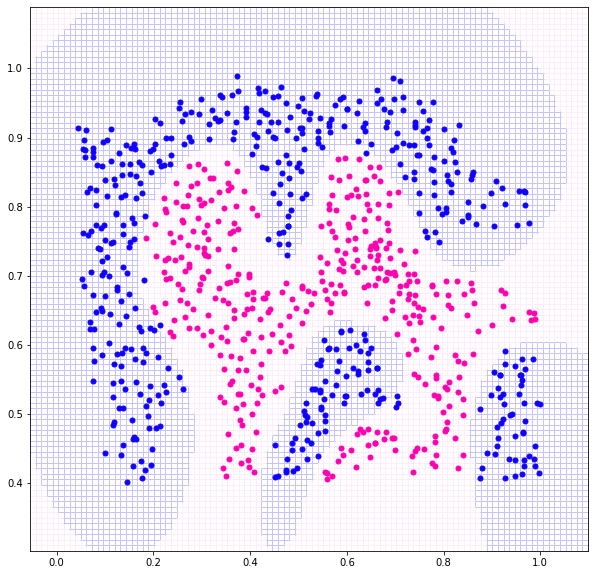

In [23]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.axis([np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1])
u = np.linspace(np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, 100)
v = np.linspace(np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1, 100)
z = []
for i in range(100):
    for j in range(100):
        z.append([u[i], v[j]])
z = np.array(z)
w = model.predict(z)
model_pos = np.where(w == 1)[0]
model_neg = np.where(w == 0)[0]
ax.plot(z[model_pos,0], z[model_pos,1], marker='+', color='#C7C3FF', markersize=10, linestyle='')
ax.plot(z[model_neg,0], z[model_neg,1], marker='+', color='#FFECFB', markersize=10, linestyle='')
pos = np.where(Y_train[:,0] == 1)[0]
neg = np.where(Y_train[:,0] == 0)[0]
ax.plot(X_train[pos,0], X_train[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='') 
ax.plot(X_train[neg,0], X_train[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='')

-----

In [24]:
data = pd.read_table('ex6data3.txt', sep=',', header=None, dtype=np.float32)
data

,0,1,2
0,-0.158986,0.423977,1.0
1,-0.347926,0.470760,1.0
2,-0.504608,0.353801,1.0
3,-0.596774,0.114035,1.0
4,-0.518433,-0.172515,1.0
...,...,...,...
406,0.005203,-0.544449,1.0
407,0.176352,-0.572454,0.0
408,0.127651,-0.340938,0.0
409,0.248682,-0.497502,0.0


In [25]:
X_train = data.iloc[:,[0,1]].values
Y_train = data.iloc[:,[2]].values

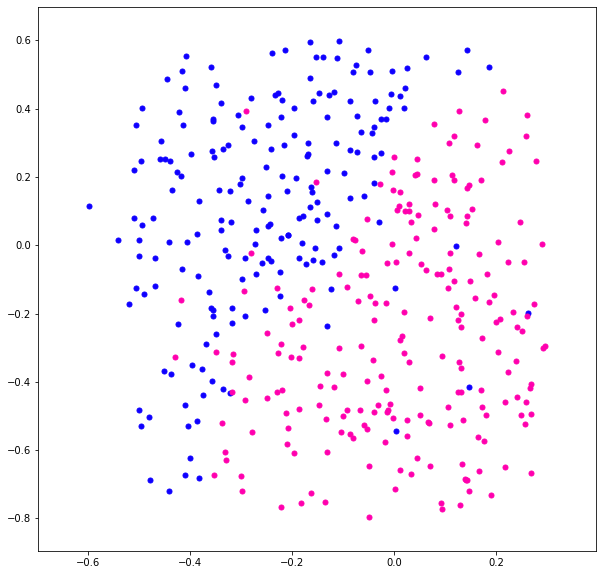

In [26]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.axis([np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1])
pos = np.where(Y_train[:,0] == 1)[0]
neg = np.where(Y_train[:,0] == 0)[0]
ax.plot(X_train[pos,0], X_train[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='') 
ax.plot(X_train[neg,0], X_train[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='')

In [27]:
model = Pipeline([('gaussian_kernel', FunctionTransformer(GaussianKernel(K=X_train, sigma=0.1))),
                  ('svm', SVC(C=1., kernel='linear', max_iter=10000))])

model.fit(X_train, Y_train.flatten()) 

Pipeline(memory=None,
         steps=[('gaussian_kernel',
                 FunctionTransformer(accept_sparse=False, check_inverse=True,
                                     func=<__main__.GaussianKernel object at 0x7fe48ae04828>,
                                     inv_kw_args=None, inverse_func=None,
                                     kw_args=None, validate=False)),
                ('svm',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=10000,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [28]:
Y_pred = model.decision_function(X_train)
Y_pred

array([ 1.96728236,  1.14587519,  1.05418783,  1.00003975,  0.99983229,
        0.46437391,  1.00864221,  0.40802735,  1.86000395,  0.99986795,
        1.6177361 ,  1.17607192,  1.01312164,  1.87950414,  1.30118776,
        1.14170489,  1.56219068,  1.06839114,  1.83053588,  1.58359857,
       -1.20205412, -1.89412143, -2.36037127, -2.35757266, -1.43970564,
       -1.06747   , -1.00471702, -1.14912365, -1.14442803, -1.02154044,
       -1.02762016, -1.88680352, -1.09231075, -1.00321477, -1.13918778,
       -1.04857207, -1.79040299, -1.21376388, -1.06603527,  0.61540273,
        0.34033632, -0.00865318, -1.39474139, -1.36536369,  1.43674032,
       -0.04637711, -1.1003293 , -1.14334871, -1.07879786, -1.32209568,
       -2.05416667, -2.85917055, -2.27044971, -2.33692743, -1.42857106,
       -1.18741092, -1.01544827, -1.00007645, -0.99992515, -1.10355979,
       -1.10351097, -1.05744878, -1.10387916, -1.00001612, -0.99997233,
       -1.24548471, -1.07939736, -1.02045974, -1.00014153, -1.00

In [29]:
hinge_loss(Y_train, Y_pred)

0.13114771405975656

In [30]:
Y_pred_label = model.predict(X_train)
Y_pred_label

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1.

In [31]:
Y_train

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [32]:
accuracy_score(Y_train, Y_pred_label)

0.9513381995133819

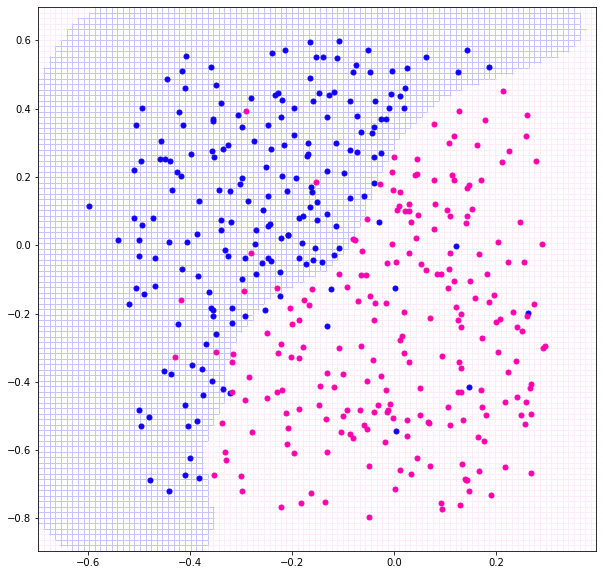

In [33]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.axis([np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1])
u = np.linspace(np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, 100)
v = np.linspace(np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1, 100)
z = []
for i in range(100):
    for j in range(100):
        z.append([u[i], v[j]])
z = np.array(z)
w = model.predict(z)
model_pos = np.where(w == 1)[0]
model_neg = np.where(w == 0)[0]
ax.plot(z[model_pos,0], z[model_pos,1], marker='+', color='#C7C3FF', markersize=10, linestyle='')
ax.plot(z[model_neg,0], z[model_neg,1], marker='+', color='#FFECFB', markersize=10, linestyle='')
pos = np.where(Y_train[:,0] == 1)[0]
neg = np.where(Y_train[:,0] == 0)[0]
ax.plot(X_train[pos,0], X_train[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='') 
ax.plot(X_train[neg,0], X_train[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='')